In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs



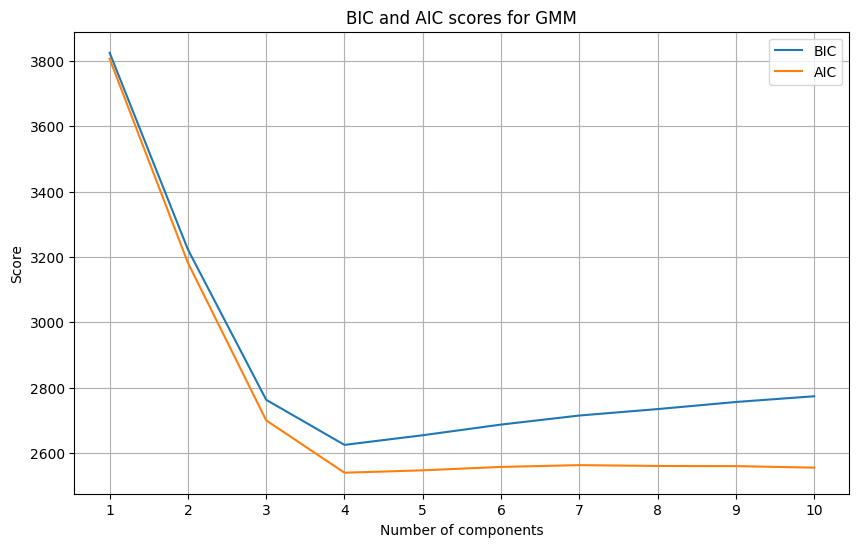

Best number of components based on BIC: 4
Best number of components based on AIC: 4


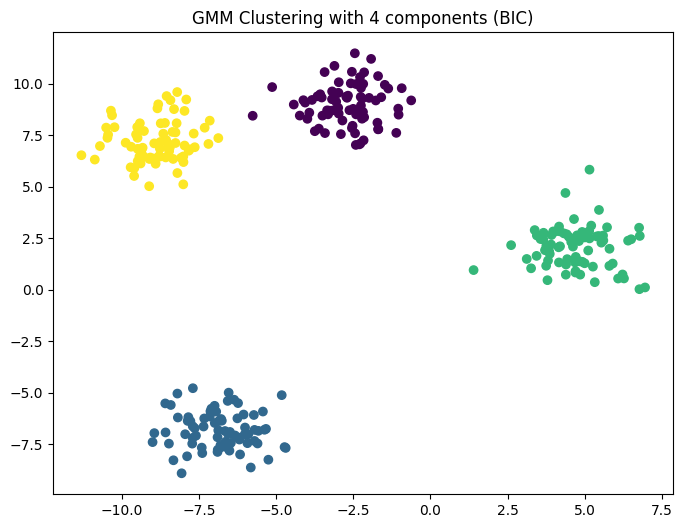

Number of components used by BayesianGaussianMixture: 4


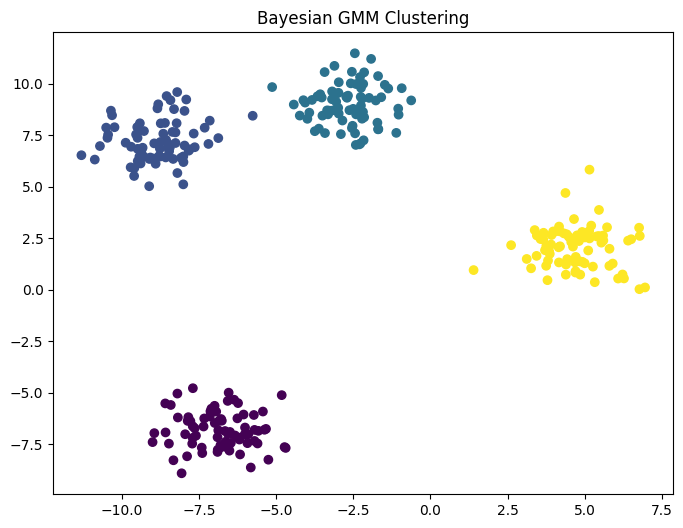

In [4]:
# Generate sample data (you can replace this with your own data)
X, y = make_blobs(n_samples=300, centers=4, random_state=42)

# Range of number of components (clusters) to test
n_components_range = range(1, 11)

# Lists to store BIC and AIC scores
bic = []
aic = []

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=42)
    gmm.fit(X)
    bic.append(gmm.bic(X))
    aic.append(gmm.aic(X))

# Plot BIC and AIC
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, bic, label='BIC')
plt.plot(n_components_range, aic, label='AIC')
plt.xlabel('Number of components')
plt.ylabel('Score')
plt.title('BIC and AIC scores for GMM')
plt.legend()
plt.xticks(n_components_range)  # Show integer ticks
plt.grid(True)
plt.show()

# Find the best number of components based on BIC
best_n_components_bic = n_components_range[np.argmin(bic)]
print(f"Best number of components based on BIC: {best_n_components_bic}")

# Find the best number of components based on AIC
best_n_components_aic = n_components_range[np.argmin(aic)]
print(f"Best number of components based on AIC: {best_n_components_aic}")


# Example of using the best GMM model
best_gmm = GaussianMixture(n_components=best_n_components_bic, covariance_type='full', random_state=42)
best_gmm.fit(X)
labels = best_gmm.predict(X)

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title(f"GMM Clustering with {best_n_components_bic} components (BIC)")
plt.show()



# Example using BayesianGaussianMixture (DPGMM equivalent)
from sklearn.mixture import BayesianGaussianMixture

bgmm = BayesianGaussianMixture(n_components=10, covariance_type='full', random_state=42, weight_concentration_prior=1e-6) #n_components is an upper bound
bgmm.fit(X)
bgmm_labels = bgmm.predict(X)

print(f"Number of components used by BayesianGaussianMixture: {len(np.unique(bgmm_labels))}")

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=bgmm_labels, cmap='viridis')
plt.title("Bayesian GMM Clustering")
plt.show()